In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
data = fits.open('data_lt_sprat/v_a_20190516_57_1_0_1.fits')[0].data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


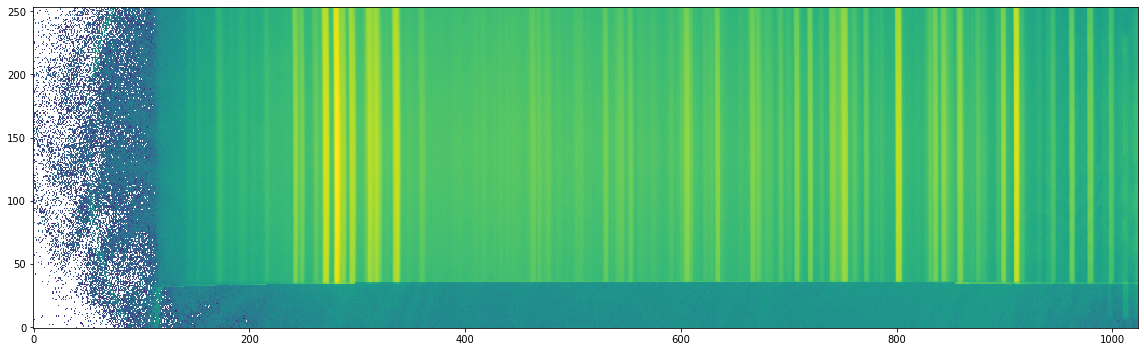

In [3]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data), aspect='auto', origin='lower')
plt.tight_layout()

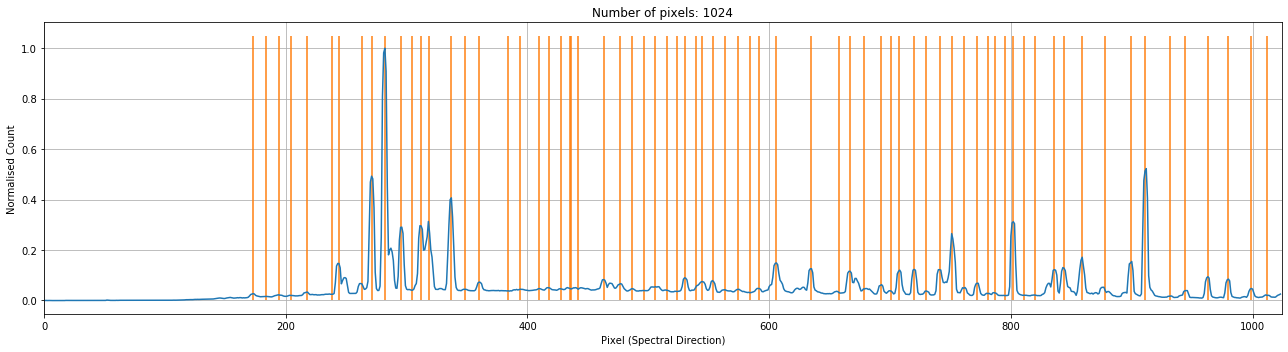

In [4]:
spectrum = np.median(data[110:120], axis=0)

peaks, _ = find_peaks(spectrum, height=200, distance=6, threshold=None)
peaks = refine_peaks(spectrum, peaks, window_width=5)

plt.figure(figsize=(18,5))
plt.plot(spectrum / spectrum.max())
plt.vlines(peaks, 0, 1.05, colors='C1')
plt.title('Number of pixels: ' + str(spectrum.shape[0]))
plt.xlabel("Pixel (Spectral Direction)")
plt.ylabel("Normalised Count")
plt.xlim(0, 1024)
plt.grid()
plt.tight_layout()

In [5]:
c = Calibrator(peaks,
               num_pix=len(spectrum),
               min_wavelength=3500.,
               max_wavelength=8000.)
c.set_fit_constraints(num_slopes=5000,
                      range_tolerance=500.,
                      xbins=100,
                      ybins=100)
c.add_atlas(elements='Xe')

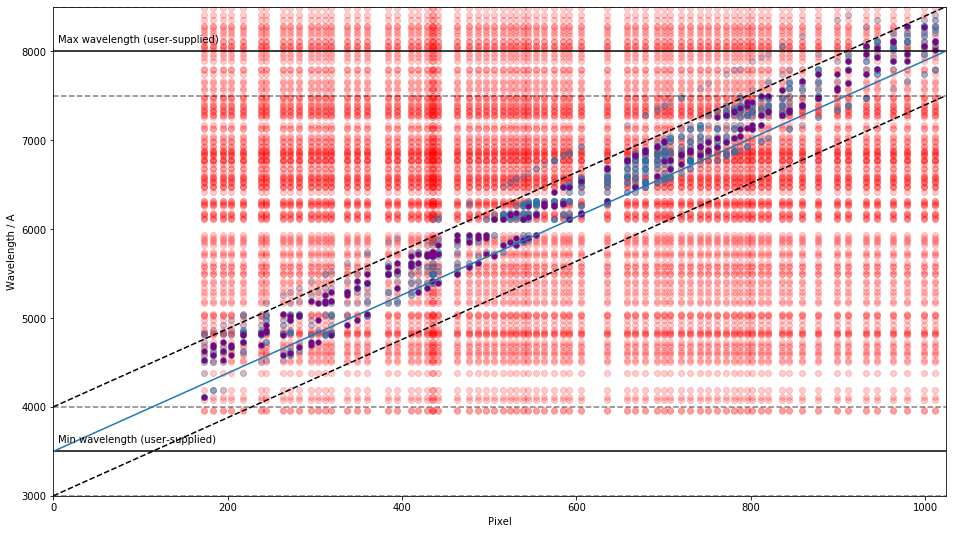

In [6]:
c.plot_search_space()

INFO:rascal.calibrator:Peak at: 4527.715551541574 A
INFO:rascal.calibrator:- matched to 4524.68 A
INFO:rascal.calibrator:Peak at: 4572.3997402200785 A
INFO:rascal.calibrator:Peak at: 4620.485553281814 A
INFO:rascal.calibrator:- matched to 4624.28 A
INFO:rascal.calibrator:Peak at: 4664.336057041127 A
INFO:rascal.calibrator:- matched to 4671.23 A
INFO:rascal.calibrator:Peak at: 4724.084472821505 A
INFO:rascal.calibrator:Peak at: 4818.113861140427 A
INFO:rascal.calibrator:- matched to 4818.0 A
INFO:rascal.calibrator:Peak at: 4844.840010077176 A
INFO:rascal.calibrator:- matched to 4844.33 A
INFO:rascal.calibrator:Peak at: 4932.926222862161 A
INFO:rascal.calibrator:Peak at: 4969.929857038858 A
INFO:rascal.calibrator:- matched to 4972.71 A
INFO:rascal.calibrator:Peak at: 5019.107490283943 A
INFO:rascal.calibrator:- matched to 5023.88 A
INFO:rascal.calibrator:Peak at: 5084.145010014867 A
INFO:rascal.calibrator:Peak at: 5123.465709581302 A
INFO:rascal.calibrator:Peak at: 5161.456427847744 A
IN

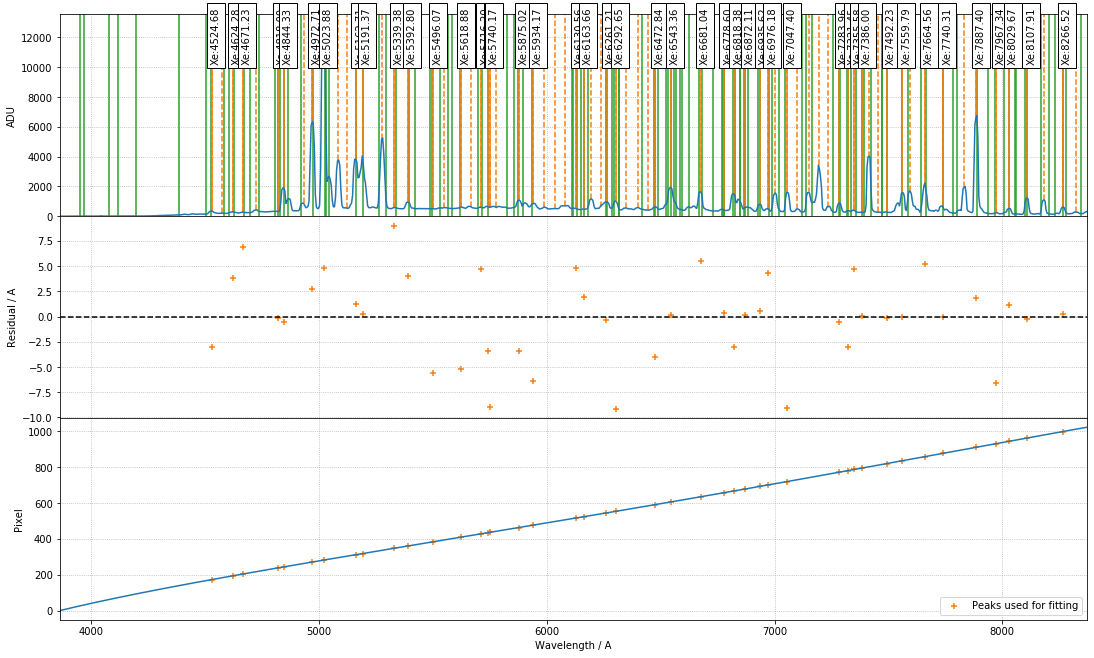

Stdev error: 0.23106184875550914 A
Peaks utilisation rate: 20.833333333333336%


In [7]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=10000)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=10., renderer='notebook')

rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

# Now, we refine this set of polynomial coefficients and apply to a different night of arc

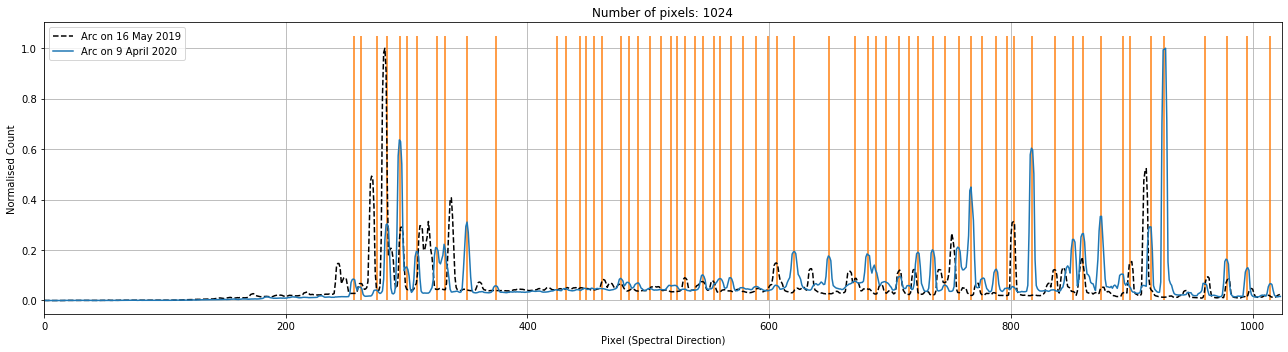

In [8]:
data2 = fits.open('data_lt_sprat/v_a_20200409_39_1_0_1.fits')[0].data
spectrum2 = np.median(data2[110:120], axis=0)

peaks2, _ = find_peaks(spectrum2, height=500, distance=5, threshold=None)
peaks2 = refine_peaks(spectrum2, peaks2, window_width=5)

plt.figure(figsize=(18,5))
plt.plot(spectrum / spectrum.max(), ls="--", color='black', label='Arc on 16 May 2019')
plt.plot(spectrum2 / spectrum2.max(), label='Arc on 9 April 2020')
plt.vlines(peaks2, 0, 1.05, colors='C1')
plt.title('Number of pixels: ' + str(spectrum2.shape[0]))
plt.xlabel("Pixel (Spectral Direction)")
plt.ylabel("Normalised Count")
plt.xlim(0, 1024)
plt.legend()
plt.grid()
plt.tight_layout()

## (1) Refine the polynomial fit coefficients with robust_refit=False

INFO:rascal.calibrator:Peak at: 5310.266108935124 A
INFO:rascal.calibrator:Peak at: 5339.6520436973005 A
INFO:rascal.calibrator:- matched to 5339.38 A
INFO:rascal.calibrator:Peak at: 5402.800000003444 A
INFO:rascal.calibrator:Peak at: 5445.2243265368725 A
INFO:rascal.calibrator:Peak at: 5497.304915611749 A
INFO:rascal.calibrator:- matched to 5496.07 A
INFO:rascal.calibrator:Peak at: 5527.003342528145 A
INFO:rascal.calibrator:- matched to 5531.07 A
INFO:rascal.calibrator:Peak at: 5565.8843305667815 A
INFO:rascal.calibrator:- matched to 5566.62 A
INFO:rascal.calibrator:Peak at: 5646.889704059547 A
INFO:rascal.calibrator:Peak at: 5677.687808677304 A
INFO:rascal.calibrator:Peak at: 5766.5492811544445 A
INFO:rascal.calibrator:Peak at: 5881.90074813611 A
INFO:rascal.calibrator:- matched to 5875.02 A
INFO:rascal.calibrator:Peak at: 6124.923279418827 A
INFO:rascal.calibrator:- matched to 6130.56 A
INFO:rascal.calibrator:Peak at: 6160.899631115043 A
INFO:rascal.calibrator:- matched to 6163.661 

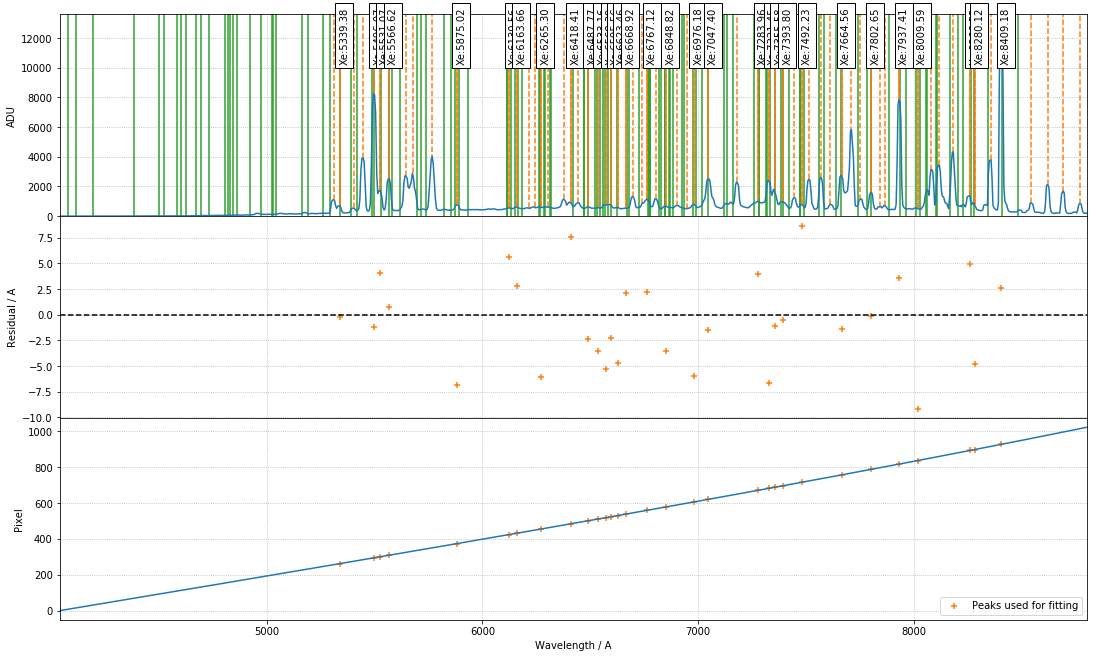

Stdev error: 4.438197561477935 A
Peaks utilisation rate: 48.4375%


In [9]:
c2 = Calibrator(peaks2,
               num_pix=len(spectrum2),
               min_wavelength=3500.,
               max_wavelength=8000.)
c2.set_fit_constraints(num_slopes=5000,
                      range_tolerance=500.,
                      xbins=100,
                      ybins=100)
c2.add_atlas(elements='Xe')

best_p2, _, _, _, _ = c2.refine_fit(best_p, delta=best_p[:1]*0.1, tolerance=100., convergence=1e-10, method='Nelder-Mead')
best_p2, x_fit2, y_fit2, residual2, peak_utilisation2 = c2.refine_fit(best_p2, delta=best_p2*0.01, tolerance=10., convergence=1e-10, method='Nelder-Mead', robust_refit=False)

c2.plot_fit(spectrum2, best_p2, plot_atlas=True, log_spectrum=False, tolerance=10., renderer='notebook')

fit_diff2 = c2.polyval(x_fit2, best_p2) - y_fit2

rms2 = np.sqrt(np.sum(fit_diff2**2 / len(x_fit2)))

print("Stdev error: {} A".format(fit_diff2.std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation2*100))

## (2) Refine the polynomial fit coefficients with robust_refit=True

In [10]:
c3 = Calibrator(peaks2,
               num_pix=1024,
               min_wavelength=3500.,
               max_wavelength=8000.)
c3.set_fit_constraints(num_slopes=5000,
                      range_tolerance=500.,
                      xbins=100,
                      ybins=100)
c3.add_atlas(elements='Xe')

best_p3, _, _, _, _ = c3.refine_fit(best_p, delta=best_p[:1]*0.1, tolerance=100., convergence=1e-10, method='Nelder-Mead')
best_p3, x_fit3, y_fit3, residual3, peak_utilisation3 = c3.refine_fit(best_p3, delta=best_p3*0.01, tolerance=10., convergence=1e-10, method='Nelder-Mead', robust_refit=True)


INFO:rascal.calibrator:Peak at: 5311.168991819028 A
INFO:rascal.calibrator:Peak at: 5340.466035914703 A
INFO:rascal.calibrator:- matched to 5339.38 A
INFO:rascal.calibrator:Peak at: 5403.430542301859 A
INFO:rascal.calibrator:Peak at: 5445.737354238418 A
INFO:rascal.calibrator:Peak at: 5497.679889810503 A
INFO:rascal.calibrator:- matched to 5496.07 A
INFO:rascal.calibrator:Peak at: 5527.302621982787 A
INFO:rascal.calibrator:- matched to 5531.07 A
INFO:rascal.calibrator:Peak at: 5566.087799100958 A
INFO:rascal.calibrator:- matched to 5566.62 A
INFO:rascal.calibrator:Peak at: 5646.905366147482 A
INFO:rascal.calibrator:Peak at: 5677.636193677307 A
INFO:rascal.calibrator:Peak at: 5766.316048147681 A
INFO:rascal.calibrator:Peak at: 5881.458796380395 A
INFO:rascal.calibrator:- matched to 5875.02 A
INFO:rascal.calibrator:Peak at: 6124.1370294281805 A
INFO:rascal.calibrator:- matched to 6130.56 A
INFO:rascal.calibrator:Peak at: 6160.072945686586 A
INFO:rascal.calibrator:- matched to 6163.661 A


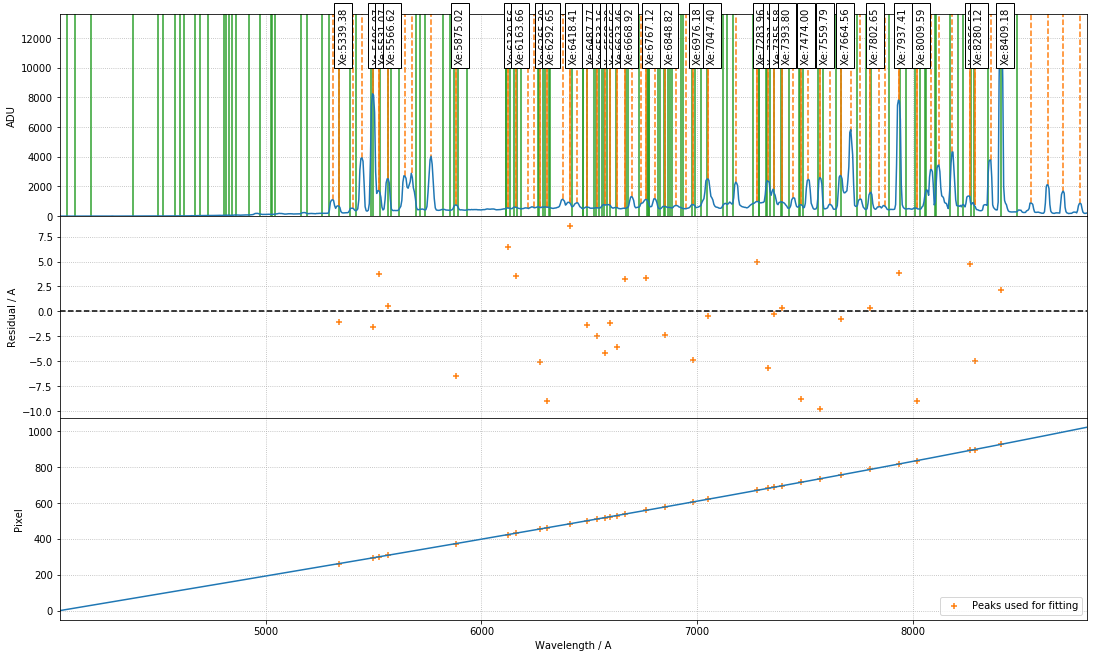

Stdev error: 4.400557915577736 A
Peaks utilisation rate: 48.4375%


In [11]:
c3.plot_fit(spectrum2, best_p3, plot_atlas=True, log_spectrum=False, tolerance=10., renderer='notebook')

fit_diff3 = c3.polyval(x_fit3, best_p3) - y_fit3

rms3 = np.sqrt(np.sum(fit_diff3**2 / len(x_fit3)))

print("Stdev error: {} A".format(fit_diff3.std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation3*100))